Starting walkability graph network analysis for a single neighborhood...
Checkpoint 1: Loading data...


Loading GeoJSON files:   0%|          | 0/3 [00:00<?, ?it/s]

Loading GeoJSON files: 100%|██████████| 3/3 [00:03<00:00,  1.20s/it]


Sample buildings data after cleaning:
  building      area_m2                                           geometry
0  unknown  2069.043777  POLYGON ((304401.483 2780904.12, 304430.995 27...
1  unknown  4981.692638  POLYGON ((304357.549 2780790.65, 304352.56 278...
2  unknown  1612.577668  POLYGON ((304223.486 2780955.968, 304272.807 2...
3  unknown   798.459598  POLYGON ((304198.345 2780903.807, 304223.102 2...
4  unknown  1451.360634  POLYGON ((304236.647 2781046.519, 304243.273 2...


Extracting road endpoints: 100%|██████████| 260/260 [00:00<00:00, 15747.34it/s]


Geometry validity - Neighborhood: True, Buildings: True, Roads: True
Sample filtered buildings:          building      area_m2  \
16440  apartments  1767.907472   
16441  apartments  1554.168691   
16442  apartments   984.637449   
16443  apartments  1817.158207   
16445     unknown   315.570480   

                                                geometry  
16440  POLYGON ((304386.345052 2769848.514076, 304385...  
16441  POLYGON ((304315.301264 2769825.535242, 304315...  
16442  POLYGON ((304311.309517 2769740.627359, 304311...  
16443  POLYGON ((304357.312647 2769825.458636, 304357...  
16445  POLYGON ((304215.749746 2769753.949737, 304234...  
Sample filtered roads: 29597    LINESTRING (303783.609249 2769584.396343, 3037...
29598    LINESTRING (303874.011718 2769312.830289, 3038...
29692    LINESTRING (304295.656464 2768745.17816, 30429...
29771    LINESTRING (304265.767371 2768639.841808, 3042...
29897    LINESTRING (303784.869942 2769623.047955, 3039...
dtype: object
Available roa

Adding neighborhood: 100%|██████████| 1/1 [00:00<00:00, 999.12it/s]


Adding building nodes...


Adding buildings: 100%|██████████| 209/209 [00:00<00:00, 24506.84it/s]


Adding road nodes...
Using column 'class' for road classification.


Adding road points: 100%|██████████| 520/520 [00:00<00:00, 74235.47it/s]


Adding edges...


Adding edges:   3%|▎         | 7143/244349 [00:00<00:28, 8446.77it/s] 

Adding road-to-road edges...


Adding edges:   3%|▎         | 7953/244349 [00:01<00:48, 4894.16it/s]


Graph built with 730 nodes and 7953 edges for 和安里.
Checkpoint 3: Calculating walkability scores...


Calculating walkability: 100%|██████████| 730/730 [00:00<?, ?it/s]


Walkability scores calculated.
Checkpoint 4: Visualizing graph for single neighborhood...


Adding label: 100%|██████████| 730/730 [00:00<00:00, 471778.42it/s]


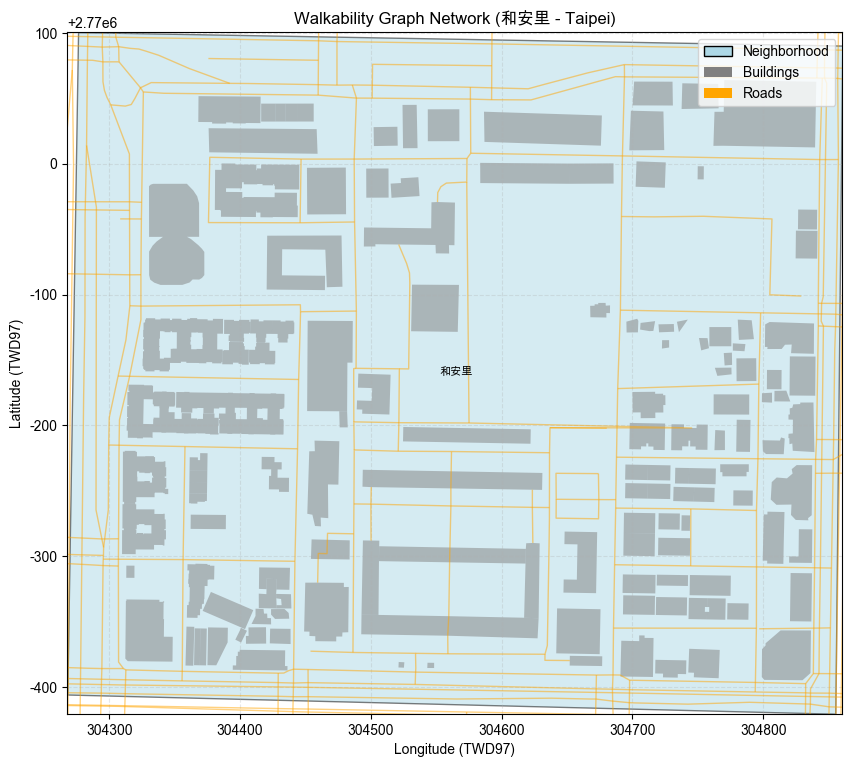

Generating interactive map...
Neighborhoods WGS84 columns: ['LIE_NAME', 'SECT_NAME', '2024population', 'land_use_city_open_area_count', 'land_use_city_open_area_area_m2', 'land_use_city_open_area_percent', 'land_use_commercial_count', 'land_use_commercial_area_m2', 'land_use_commercial_percent', 'land_use_infrastructure_count', 'land_use_infrastructure_area_m2', 'land_use_infrastructure_percent', 'land_use_government_count', 'land_use_government_area_m2', 'land_use_government_percent', 'land_use_public_transportation_count', 'land_use_public_transportation_area_m2', 'land_use_public_transportation_percent', 'land_use_education_count', 'land_use_education_area_m2', 'land_use_education_percent', 'land_use_medical_count', 'land_use_medical_area_m2', 'land_use_medical_percent', 'land_use_amenity_count', 'land_use_amenity_area_m2', 'land_use_amenity_percent', 'land_use_road_count', 'land_use_road_area_m2', 'land_use_road_percent', 'land_use_pedestrian_count', 'land_use_pedestrian_area_m2', 

Adding buildings to map: 100%|██████████| 209/209 [00:00<00:00, 9656.95it/s]

Starting roads GeoJSON construction...
Processing road row 29597: cycleway
Processing road row 29598: footway
Processing road row 29692: footway
Processing road row 29771: trunk
Processing road row 29897: footway
Processing road row 29905: service
Processing road row 29906: service
Processing road row 29965: service
Processing road row 29967: service
Processing road row 29980: footway
Processing road row 29986: tertiary
Processing road row 29994: secondary
Processing road row 29995: footway
Processing road row 29996: footway
Processing road row 29997: tertiary
Processing road row 29998: secondary
Processing road row 30004: tertiary
Processing road row 30005: footway
Processing road row 30006: secondary
Processing road row 30007: trunk
Processing road row 30008: secondary
Processing road row 30009: tertiary
Processing road row 30010: footway
Processing road row 30011: secondary
Processing road row 30012: secondary
Processing road row 30013: tertiary
Processing road row 30015: tertiary
P

Interactive map saved successfully at D:\IAAC\Thesis\Python\MLloading\Geojson\GNN_Read_data\walkability_map_和安里.html
Analysis completed successfully for single neighborhood.


In [26]:
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
import os
from shapely.geometry import Point, LineString
import numpy as np
from tqdm import tqdm
import pandas as pd
import pickle
import pyproj
import json

# Define checkpoint directory
CHECKPOINT_DIR = r"D:\IAAC\Thesis\Python\MLloading\Geojson\GNN_Read_data\checkpoints"

if not os.path.exists(CHECKPOINT_DIR):
    os.makedirs(CHECKPOINT_DIR)

# Set Matplotlib font to Arial Unicode MS for Chinese characters
plt.rcParams['font.family'] = 'Arial Unicode MS'
plt.rcParams['axes.unicode_minus'] = False

# Helper function to convert TWD97 (EPSG:3826) to WGS84 (EPSG:4326)
def twd97_to_wgs84(x, y):
    transformer = pyproj.Transformer.from_crs("EPSG:3826", "EPSG:4326", always_xy=True)
    lon, lat = transformer.transform(x, y)
    return lat, lon

# 1. Load Data with Checkpoints and Progress Bar
def load_data(target_neighborhood="和安里"):
    print("Checkpoint 1: Loading data...")
    landuse_ndvi_path = r"D:\IAAC\Thesis\Python\MLloading\Geojson\GNN_Read_data\neighborhoods_with_ndvi_numerical.geojson"
    osm_buildings_path = r"D:\IAAC\Thesis\Python\MLloading\Geojson\GNN_Read_data\Taipei_Buildings_fulldata.geojson"
    osm_roads_path = r"D:\IAAC\Thesis\Python\MLloading\Geojson\GNN_Read_data\taipei_segments_cleaned_verified.geoparquet"

    for path in [landuse_ndvi_path, osm_buildings_path, osm_roads_path]:
        if not os.path.exists(path):
            raise FileNotFoundError(f"File not found: {path}")

    with tqdm(total=3, desc="Loading GeoJSON files") as pbar:
        neighborhoods = gpd.read_file(landuse_ndvi_path)
        pbar.update(1)
        buildings = gpd.read_file(osm_buildings_path)
        pbar.update(1)
        roads = gpd.read_parquet(osm_roads_path)
        pbar.update(1)

    # Ensure all data is in EPSG:3826 (TWD97)
    neighborhoods = neighborhoods.to_crs('EPSG:3826')
    buildings = buildings.to_crs('EPSG:3826')
    roads = roads.to_crs('EPSG:3826')

    # Filter invalid geometries and calculate areas for buildings
    neighborhoods = neighborhoods[neighborhoods.geometry.is_valid]
    buildings = buildings[buildings.geometry.is_valid].copy()
    roads = roads[roads.geometry.is_valid]

    # Calculate building areas
    buildings['area_m2'] = buildings.geometry.area

    # Clean and standardize the 'building' column
    buildings['building'] = buildings['building'].fillna('unknown').replace('yes', 'unknown')
    building_type_mapping = {
        'apartments': 'apartments',
        'school': 'school',
        'office': 'office',
        'commercial': 'commercial',
        'unknown': 'unknown'
    }
    buildings['building'] = buildings['building'].map(lambda x: building_type_mapping.get(x, 'unknown'))

    # Print sample data for debugging
    print("Sample buildings data after cleaning:")
    print(buildings[['building', 'area_m2', 'geometry']].head())

    # Filter for the target neighborhood
    target_neigh = neighborhoods[neighborhoods['LIE_NAME'] == target_neighborhood].iloc[0]
    if target_neigh.empty:
        raise ValueError(f"Neighborhood '{target_neighborhood}' not found in the data.")

    # Get the neighborhood geometry with a buffer
    target_geom = target_neigh['geometry']
    buffer_distance = 50
    buffered_geom = target_geom.buffer(buffer_distance)

    # Filter buildings and roads
    filtered_buildings = buildings[buildings.intersects(buffered_geom)]
    filtered_roads = roads[roads.intersects(buffered_geom)].copy()
    road_points = []
    for idx, row in tqdm(filtered_roads.iterrows(), total=len(filtered_roads), desc="Extracting road endpoints"):
        geom = row['geometry']
        if geom.geom_type == 'LineString':
            start_point = Point(geom.coords[0])
            end_point = Point(geom.coords[-1])
            road_points.extend([(f"road_start_{idx}", start_point), (f"road_end_{idx}", end_point)])
        elif geom.geom_type == 'MultiLineString':
            for i, line in enumerate(geom.geoms):
                start_point = Point(line.coords[0])
                end_point = Point(line.coords[-1])
                road_points.extend([(f"road_start_{idx}_{i}", start_point), (f"road_end_{idx}_{i}", end_point)])

    # Ensure filtered data has valid geometries
    filtered_buildings = filtered_buildings[filtered_buildings.geometry.is_valid]
    filtered_roads = filtered_roads[filtered_roads.geometry.is_valid]

    # Debugging
    print(f"Geometry validity - Neighborhood: {target_geom.is_valid}, Buildings: {filtered_buildings.geometry.is_valid.all()}, Roads: {filtered_roads.geometry.is_valid.all()}")
    print(f"Sample filtered buildings: {filtered_buildings[['building', 'area_m2', 'geometry']].head().to_wkt()}")
    print(f"Sample filtered roads: {filtered_roads.geometry.head().to_wkt()}")
    print(f"Available road columns: {filtered_roads.columns.tolist()}")
    class_column = next((col for col in filtered_roads.columns if col.lower() in ['class', 'road_class', 'highway']), None)
    if class_column:
        print(f"Unique road classes: {filtered_roads[class_column].unique()}")
    else:
        print("Warning: No road classification column found (e.g., 'class', 'road_class', 'highway').")

    # Save checkpoints
    neighborhoods[neighborhoods['LIE_NAME'] == target_neighborhood].to_file(os.path.join(CHECKPOINT_DIR, f"neighborhoods_{target_neighborhood}_filtered.geojson"), driver='GeoJSON')
    filtered_buildings.to_file(os.path.join(CHECKPOINT_DIR, f"buildings_{target_neighborhood}_filtered.geojson"), driver='GeoJSON')
    filtered_roads.to_file(os.path.join(CHECKPOINT_DIR, f"roads_{target_neighborhood}_filtered.geojson"), driver='GeoJSON')

    print(f"Data loaded and filtered for {target_neighborhood}. Neighborhoods: 1, Buildings: {len(filtered_buildings)}, Roads: {len(filtered_roads)}")
    return neighborhoods[neighborhoods['LIE_NAME'] == target_neighborhood], filtered_buildings, filtered_roads, road_points

# 2. Build Graph Network with Checkpoints
def build_graph(neighborhoods, buildings, roads, road_points, target_neighborhood="和安里"):
    print(f"Checkpoint 2: Building graph network for {target_neighborhood}...")
    G = nx.Graph()

    # Add Neighborhood Node
    print("Adding neighborhood node...")
    for idx, row in tqdm(neighborhoods.iterrows(), total=len(neighborhoods), desc="Adding neighborhood"):
        node_id = f"neighborhood_{row['LIE_NAME']}"
        G.add_node(node_id,
                   type='neighborhood',
                   lie_name=row['LIE_NAME'],
                   sect_name=row['SECT_NAME'],
                   population=row['2024population'],
                   land_use_residential_percent=row['land_use_residential_percent'],
                   land_use_commercial_percent=row['land_use_commercial_percent'],
                   land_use_education_percent=row['land_use_education_percent'],
                   ndvi_mean=row['ndvi_mean'],
                   ndvi_median=row['ndvi_median'],
                   geometry=row['geometry'])

    # Add Building Nodes
    print("Adding building nodes...")
    for idx, row in tqdm(buildings.iterrows(), total=len(buildings), desc="Adding buildings"):
        node_id = f"building_{idx}"
        building_type = row['building'] if pd.notna(row['building']) else 'unknown'
        area_m2 = row['area_m2'] if pd.notna(row['area_m2']) else 0.0
        age = row['屋齡'] if pd.notna(row['屋齡']) else '<NA>'
        height = row['建物高度'] if pd.notna(row['建物高度']) else '<NA>'
        floors = row['地上層數'] if pd.notna(row['地上層數']) else '<NA>'
        structure_type = row['構造種類'] if pd.notna(row['構造種類']) else 'Unknown'
        usage_zone = row['使用分區'] if pd.notna(row['使用分區']) else 'Unknown'
        G.add_node(node_id,
                   type='building',
                   building_type=building_type,
                   area_m2=area_m2,
                   age=age,
                   height=height,
                   floors=floors,
                   structure_type=structure_type,
                   usage_zone=usage_zone,
                   geometry=row['geometry'])

    # Add Road Nodes
    print("Adding road nodes...")
    class_column = next((col for col in roads.columns if col.lower() in ['class', 'road_class', 'highway']), None)
    if class_column is None:
        print(f"Warning: No column resembling 'class', 'road_class', or 'highway' found in roads data. Available columns: {roads.columns.tolist()}")
        class_column = 'unknown'  # Default to 'unknown' if no classification column is found
    else:
        print(f"Using column '{class_column}' for road classification.")

    for node_id, geom in tqdm(road_points, total=len(road_points), desc="Adding road points"):
        road_idx = int(node_id.split('_')[2])
        road_class = roads.loc[road_idx, class_column] if pd.notna(roads.loc[road_idx, class_column]) else 'unknown'
        G.add_node(node_id, type='road', road_class=road_class, geometry=geom)

    # Add Edges
    buffer_distance = 500
    print("Adding edges...")
    total_edges = (len([n for n, d in G.nodes(data=True) if d['type'] == 'neighborhood']) * 
                   len([n for n, d in G.nodes(data=True) if d['type'] == 'building'])) + \
                  (len([n for n, d in G.nodes(data=True) if d['type'] == 'neighborhood']) * 
                   len([n for n, d in G.nodes(data=True) if d['type'] == 'road'])) + \
                  (len([n for n, d in G.nodes(data=True) if d['type'] == 'building']) * 
                   len([n for n, d in G.nodes(data=True) if d['type'] == 'road'])) + \
                  max(0, len(road_points) * (len(road_points) - 1) // 2)
    with tqdm(total=total_edges, desc="Adding edges") as pbar:
        # Neighborhood to Building Edges
        for neighborhood_node in [n for n, d in G.nodes(data=True) if d['type'] == 'neighborhood']:
            neigh_geom = G.nodes[neighborhood_node]['geometry']
            neigh_buffer = neigh_geom.buffer(buffer_distance)
            for building_node in [n for n, d in G.nodes(data=True) if d['type'] == 'building']:
                build_geom = G.nodes[building_node]['geometry']
                if neigh_buffer.intersects(build_geom):
                    distance = neigh_geom.distance(build_geom)
                    G.add_edge(neighborhood_node, building_node, weight=distance, type='walk')
                    pbar.update(1)

        # Neighborhood to Road Edges
        for neighborhood_node in [n for n, d in G.nodes(data=True) if d['type'] == 'neighborhood']:
            neigh_geom = G.nodes[neighborhood_node]['geometry']
            neigh_buffer = neigh_geom.buffer(buffer_distance)
            for road_node in [n for n, d in G.nodes(data=True) if d['type'] == 'road']:
                road_geom = G.nodes[road_node]['geometry']
                if isinstance(road_geom, Point) and neigh_buffer.intersects(road_geom):
                    distance = neigh_geom.distance(road_geom)
                    G.add_edge(neighborhood_node, road_node, weight=distance, type='walk')
                    pbar.update(1)

        # Building to Road Edges
        for building_node in [n for n, d in G.nodes(data=True) if d['type'] == 'building']:
            build_geom = G.nodes[building_node]['geometry']
            build_buffer = build_geom.buffer(100)
            for road_node in [n for n, d in G.nodes(data=True) if d['type'] == 'road']:
                road_geom = G.nodes[road_node]['geometry']
                if isinstance(road_geom, Point) and build_buffer.intersects(road_geom):
                    distance = build_geom.distance(road_geom)
                    G.add_edge(building_node, road_node, weight=distance, type='walk')
                    pbar.update(1)

        # Road to Road Edges with proximity-based connectivity
        if road_points:
            road_class_weights = {
                'footway': 0.5,      # Very narrow, pedestrian-only, safest
                'pedestrian': 0.5,   # Very narrow, pedestrian-only, safest
                'cycleway': 0.6,     # Narrow, bike-friendly, safe
                'steps': 0.6,        # Narrow, bike-friendly, safe
                'living_street': 0.6,# Mostly nightmarket, safe
                'path': 0.7,         # Narrow trail, safe
                'tack': 0.7,         # Narrow trail, safe
                'residential': 0.8,  # Narrow local roads, moderately safe
                'service': 1.0,      # Access roads, moderate traffic
                'unclassified': 1.2, # Undefined but likely narrow, slight penalty
                'tertiary': 1.5,     # Wider, moderate traffic
                'secondary': 2.0,    # Wider, higher traffic
                'primary': 2.5,      # Major road, significant traffic
                'highway': 3.5,      # Major highway, least walkable
                'motorway': 2.5,     # Major way, least walkable
                'trunk': 2.5,        # Major hway, least walkable
                'unclassified': 1, 
                'unknown': 1.0       # Default for unclassified roads
            }
            print("Adding road-to-road edges...")
            tolerance = 10  # meters in EPSG:3826
            for i, (node1_id, geom1) in enumerate(road_points):
                for j, (node2_id, geom2) in enumerate(road_points[i+1:], start=i+1):
                    if geom1.distance(geom2) <= tolerance:
                        road1_idx = int(node1_id.split('_')[2])
                        road2_idx = int(node2_id.split('_')[2])
                        class1 = roads.loc[road1_idx, class_column] if pd.notna(roads.loc[road1_idx, class_column]) else 'unknown'
                        class2 = roads.loc[road2_idx, class_column] if pd.notna(roads.loc[road2_idx, class_column]) else 'unknown'
                        weight1 = road_class_weights.get(class1, road_class_weights['unknown'])
                        weight2 = road_class_weights.get(class2, road_class_weights['unknown'])
                        distance = geom1.distance(geom2)
                        weight = distance * (weight1 + weight2) / 2
                        G.add_edge(node1_id, node2_id, weight=weight, type='road')
                        pbar.update(1)

    # Save checkpoint
    with open(os.path.join(CHECKPOINT_DIR, f"graph_with_edges_{target_neighborhood}.pkl"), 'wb') as f:
        pickle.dump(G, f)

    print(f"Graph built with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges for {target_neighborhood}.")
    return G

# 3. Calculate Walkability Scores
def calculate_walkability(G, neighborhoods, target_neighborhood="和安里"):
    print("Checkpoint 3: Calculating walkability scores...")
    for node in tqdm(G.nodes(), total=G.number_of_nodes(), desc="Calculating walkability"):
        if G.nodes[node]['type'] == 'neighborhood':
            land_use_score = (G.nodes[node]['land_use_residential_percent'] * 0.4 +
                             G.nodes[node]['land_use_commercial_percent'] * 0.3 +
                             G.nodes[node]['land_use_education_percent'] * 0.2) / 100
            ndvi_score = G.nodes[node]['ndvi_mean'] * 0.5
            walkability = min(1.0, land_use_score + ndvi_score)
            G.nodes[node]['walkability'] = walkability

    # Update the neighborhood GeoDataFrame
    for node, data in G.nodes(data=True):
        if data['type'] == 'neighborhood':
            neighborhoods.loc[neighborhoods['LIE_NAME'] == data['lie_name'], 'walkability'] = data['walkability']

    # Save checkpoint
    with open(os.path.join(CHECKPOINT_DIR, f"walkability_scores_{target_neighborhood}.pkl"), 'wb') as f:
        pickle.dump(G, f)

    print("Walkability scores calculated.")
    return G

# 4. Visualize Graph with Layer Control
def visualize_graph(G, neighborhoods, buildings, roads):
    print("Checkpoint 4: Visualizing graph for single neighborhood...")
    # Matplotlib Plot with Cropping
    fig, ax = plt.subplots(figsize=(10, 10))
    # Plot neighborhood with boundary
    neighborhoods.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5, label='Neighborhood')
    # Get neighborhood bounds for cropping
    bounds = neighborhoods.geometry.total_bounds  # [minx, miny, maxx, maxy]
    ax.set_xlim(bounds[0], bounds[2])  # Set x-limits to neighborhood extent
    ax.set_ylim(bounds[1], bounds[3])  # Set y-limits to neighborhood extent
    # Plot buildings and roads within bounds
    buildings.plot(ax=ax, color='gray', markersize=5, alpha=0.5, label='Buildings')
    if not roads.empty:
        roads.plot(ax=ax, color='orange', linewidth=1, alpha=0.5, label='Roads')
    else:
        print("No roads to plot for this neighborhood.")

    for node, data in tqdm(G.nodes(data=True), total=G.number_of_nodes(), desc="Adding label"):
        if data['type'] == 'neighborhood':
            x, y = data['geometry'].centroid.x, data['geometry'].centroid.y
            ax.text(x, y, data['lie_name'], fontsize=8, ha='center', va='center')

    plt.title(f"Walkability Graph Network ({neighborhoods['LIE_NAME'].iloc[0]} - Taipei)", fontsize=12)
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='lightblue', edgecolor='black', label='Neighborhood'),
        Patch(facecolor='gray', label='Buildings'),
        Patch(facecolor='orange', label='Roads')
    ]
    ax.legend(handles=legend_elements, loc='upper right')
    plt.xlabel("Longitude (TWD97)")
    plt.ylabel("Latitude (TWD97)")
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.savefig(os.path.join(r"D:\IAAC\Thesis\Python\MLloading\Geojson\GNN_Read_data", f"walkability_graph_{neighborhoods['LIE_NAME'].iloc[0]}.png"))
    plt.show()

    # Interactive Folium Map with Layer Control and Debugging
    print("Generating interactive map...")
    import folium
    try:
        # Convert to WGS84 and ensure geometry column is preserved
        neighborhoods_wgs84 = neighborhoods.to_crs('EPSG:4326')
        if 'geometry' not in neighborhoods_wgs84.columns:
            neighborhoods_wgs84 = neighborhoods_wgs84.set_geometry('geometry')  # Explicitly set geometry column
        print(f"Neighborhoods WGS84 columns: {neighborhoods_wgs84.columns.tolist()}")  # Debug columns
        print(f"Neighborhoods WGS84 geometry validity: {neighborhoods_wgs84.geometry.is_valid.all()}")  # Debug geometry validity
        print(f"Neighborhoods WGS84 first row geometry: {neighborhoods_wgs84.geometry.iloc[0]}")  # Debug first geometry

        buildings_wgs84 = buildings.to_crs('EPSG:4326')
        roads_wgs84 = roads.to_crs('EPSG:4326')

        # Map center
        center_x, center_y = neighborhoods.geometry.centroid.x.iloc[0], neighborhoods.geometry.centroid.y.iloc[0]
        center_lat, center_lon = twd97_to_wgs84(center_x, center_y)
        m = folium.Map(location=[center_lat, center_lon], zoom_start=15, tiles="OpenStreetMap")

        # Manually construct GeoJSON for neighborhoods
        print("Starting neighborhood GeoJSON construction...")
        geojson_data = {"type": "FeatureCollection", "features": []}
        for idx, row in neighborhoods_wgs84.iterrows():
            print(f"Processing neighborhood row {idx}: {row['LIE_NAME']}")
            feature = {
                "type": "Feature",
                "geometry": row.geometry.__geo_interface__,  # Use dictionary directly
                "properties": row.drop('geometry').to_dict()
            }
            geojson_data["features"].append(feature)
        geojson_str = json.dumps(geojson_data)  # Convert to JSON string
        print(f"Type of geojson_data: {type(geojson_data)}")  # Debug the type of the input
        print(f"Type of geojson_str: {type(geojson_str)}")  # Debug the type of the string
        print(f"Attempting to write neighborhood debug file to: {os.path.abspath('debug_manual_neighborhoods_geojson.json')}")
        try:
            with open('debug_manual_neighborhoods_geojson.json', 'w', encoding='utf-8') as f:
                json.dump(geojson_data, f)
            print("Neighborhood debug file written successfully.")
        except Exception as e:
            print(f"Error writing neighborhood debug file: {e}")
        print("Manual GeoJSON debug file saved as debug_manual_neighborhoods_geojson.json")

        # Add neighborhood layer
        print(f"Passing to folium.GeoJson (type: {type(geojson_str)}): {geojson_str[:100]}...")  # Debug input to folium
        neighborhood_layer = folium.GeoJson(
            geojson_str,  # Pass the JSON string
            style_function=lambda feature: {
                'fillColor': 'blue' if feature['properties'].get('walkability', 0) > 0.7 else 'lightblue',
                'color': 'black',
                'weight': 1,
                'fillOpacity': 0.5,
            },
            tooltip=folium.GeoJsonTooltip(
                fields=['LIE_NAME', 'SECT_NAME', 'walkability', 'ndvi_mean', 'land_use_city_open_area_percent', 
                        'land_use_commercial_percent', 'land_use_education_percent', 'land_use_residential_percent'],
                aliases=['Neighborhood Name', 'Section Name', 'Walkability', 'NDVI', 'City Open Area (%)', 
                         'Commercial Area (%)', 'Education Area (%)', 'Residential Area (%)'],
                localize=True
            ),
            name="Neighborhoods"
        ).add_to(m)

        # Add buildings layer
        building_markers = folium.FeatureGroup(name="Buildings")
        for _, row in tqdm(buildings_wgs84.iterrows(), total=len(buildings_wgs84), desc="Adding buildings to map"):
            # Exclude 'full_id' and 'geometry' from the tooltip
            tooltip_content = "<table>"
            for col in buildings_wgs84.columns:
                if col in ['full_id', 'geometry']:  # Skip these fields
                    continue
                value = row[col] if pd.notna(row[col]) else 'N/A'
                # Format area_m2 to 2 decimal places
                if col == 'area_m2' and isinstance(value, (int, float)):
                    value = f"{value:.2f}"
                tooltip_content += f"<tr><th>{col}</th><td>{value}</td></tr>"
            tooltip_content += "</table>"
            folium.Marker(
                location=[row.geometry.centroid.y, row.geometry.centroid.x],
                icon=folium.Icon(color='gray', icon='building', prefix='glyphicon'),
                tooltip=folium.Tooltip(tooltip_content, sticky=True)
            ).add_to(building_markers)
        building_markers.add_to(m)

        # Add roads layer
        if not roads_wgs84.empty:
            print("Starting roads GeoJSON construction...")
            roads_geojson = {"type": "FeatureCollection", "features": []}
            for idx, row in roads_wgs84.iterrows():
                print(f"Processing road row {idx}: {row['class']}")
                feature = {
                    "type": "Feature",
                    "geometry": row.geometry.__geo_interface__,  # Use dictionary directly
                    "properties": row.drop('geometry').to_dict()
                }
                roads_geojson["features"].append(feature)
            roads_geojson_str = json.dumps(roads_geojson)  # Convert to JSON string
            print(f"Type of roads_geojson: {type(roads_geojson)}")  # Debug the type of the input
            print(f"Type of roads_geojson_str: {type(roads_geojson_str)}")  # Debug the type of the string
            print(f"Attempting to write roads debug file to: {os.path.abspath('debug_manual_roads_geojson.json')}")
            try:
                with open('debug_manual_roads_geojson.json', 'w', encoding='utf-8') as f:
                    json.dump(roads_geojson, f)
                print("Roads debug file written successfully.")
            except Exception as e:
                print(f"Error writing roads debug file: {e}")
            print("Manual GeoJSON debug file saved as debug_manual_roads_geojson.json")
            print(f"Passing to folium.GeoJson (type: {type(roads_geojson_str)}): {roads_geojson_str[:100]}...")  # Debug input to folium
            road_layer = folium.GeoJson(
                roads_geojson_str,  # Pass the JSON string
                style_function=lambda feature: {'color': 'orange', 'weight': 2, 'opacity': 0.5},
                name="Roads"
            ).add_to(m)
        else:
            print("No roads to add to the interactive map for this neighborhood.")

        # Add layer control
        folium.LayerControl().add_to(m)

        # Save map with error handling
        output_path = os.path.join(r"D:\IAAC\Thesis\Python\MLloading\Geojson\GNN_Read_data", f"walkability_map_{neighborhoods['LIE_NAME'].iloc[0]}.html")
        try:
            m.save(output_path)
            print(f"Interactive map saved successfully at {output_path}")
        except Exception as e:
            print(f"Error saving map: {e}")
    except Exception as e:
        print(f"Error generating interactive map: {e}")

# 5. Main Execution
def main():
    print("Starting walkability graph network analysis for a single neighborhood...")
    try:
        neighborhoods, buildings, roads, road_points = load_data(target_neighborhood="和安里")
        G = build_graph(neighborhoods, buildings, roads, road_points, target_neighborhood="和安里")
        G = calculate_walkability(G, neighborhoods, target_neighborhood="和安里")
        visualize_graph(G, neighborhoods, buildings, roads)
        print("Analysis completed successfully for single neighborhood.")
    except Exception as e:
        print(f"Error during analysis: {e}")

if __name__ == "__main__":
    main()